In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.measure import label, regionprops

from skimage.exposure import rescale_intensity

In [2]:
img1 = plt.imread('./3A.tif')

img2 = plt.imread('./3B.tif')

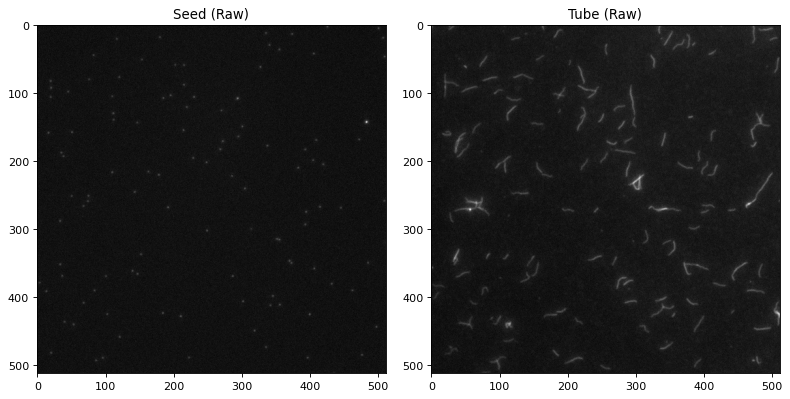

In [3]:
fig = plt.figure(figsize=(10, 5), dpi = 80)

plt.subplot(1, 2, 1)
plt.title("Seed (Raw)")
plt.imshow(img1, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Tube (Raw)")
plt.imshow(img2, cmap="gray")

plt.tight_layout()
plt.show()

## Seed Location Map

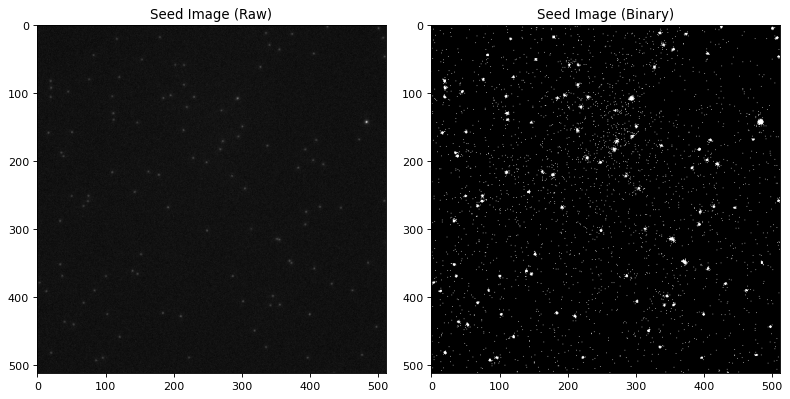

In [4]:
binary = img1 > (img1.mean() + 2*img1.std())

fig = plt.figure(figsize=(10, 5), dpi = 80)

plt.subplot(1, 2, 1)
plt.title("Seed Image (Raw)")
plt.imshow(img1, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Seed Image (Binary)")
plt.imshow(binary, cmap="gray")

plt.tight_layout()
plt.show()

In [5]:
# use labeling function to identify connected blobs
label_im = label(binary)
seed_lists = regionprops(label_im)
seed_lists = [i for i in seed_lists if i.area > 5]
seed_map = np.zeros_like(binary)

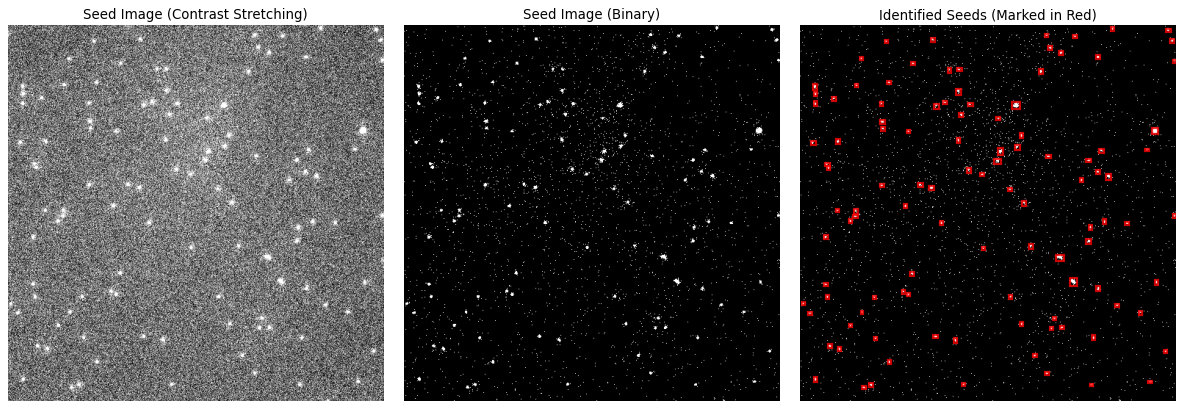

In [6]:
figure = plt.figure(figsize=(15, 5), dpi = 80)

plt.subplot(1, 3, 1)
plt.title("Seed Image (Contrast Stretching)")
p2, p98 = np.percentile(img1, (2, 98))
img_rescale = rescale_intensity(img1, in_range=(p2, p98))
plt.imshow(img_rescale, cmap = "gray")
plt.axis(False)

plt.subplot(1, 3, 2)
plt.title("Seed Image (Binary)")
plt.imshow(binary, cmap = "gray")
plt.axis(False)

ax = plt.subplot(1, 3, 3)
plt.title("Identified Seeds (Marked in Red)")
ax.imshow(binary, cmap="gray")
for i in seed_lists:
    minr, minc, maxr, maxc = i.bbox
    seed_map[minr:maxr, minc:maxc]=1
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2, alpha=.8)
    ax.add_patch(rect)
plt.axis(False)
    
plt.tight_layout()
plt.show()

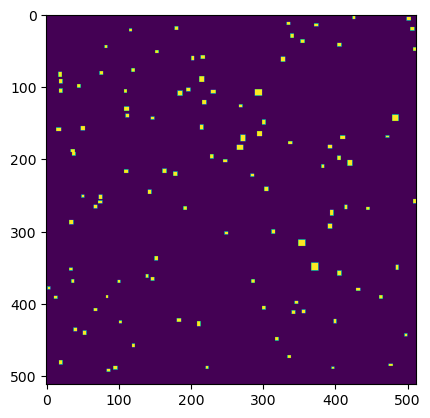

In [7]:
plt.imshow(seed_map)

## Tube Location Map

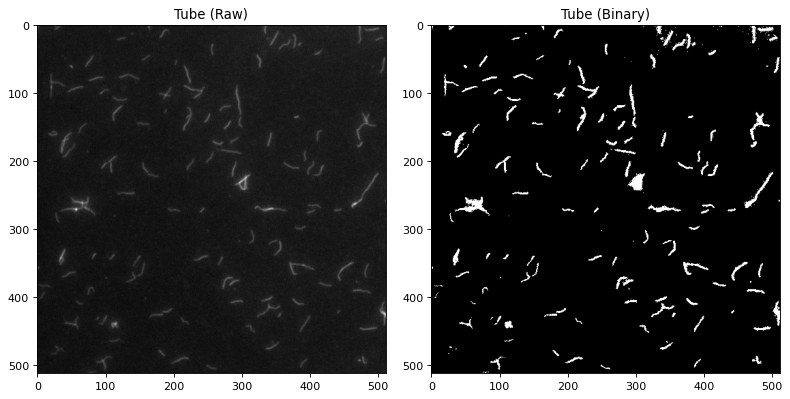

In [8]:
binary = img2 > (img2.mean() + 2*img2.std())

fig = plt.figure(figsize=(10, 5), dpi = 80)

plt.subplot(1, 2, 1)
plt.title("Tube (Raw)")
plt.imshow(img2, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Tube (Binary)")
plt.imshow(binary, cmap="gray")

plt.tight_layout()
plt.show()

In [9]:
# use labeling function to identify connected blobs
label_im = label(binary)
tube_lists = regionprops(label_im)
tube_lists = [i for i in tube_lists if i.area > 10 and i.area < 250]
tube_map = np.zeros_like(binary)

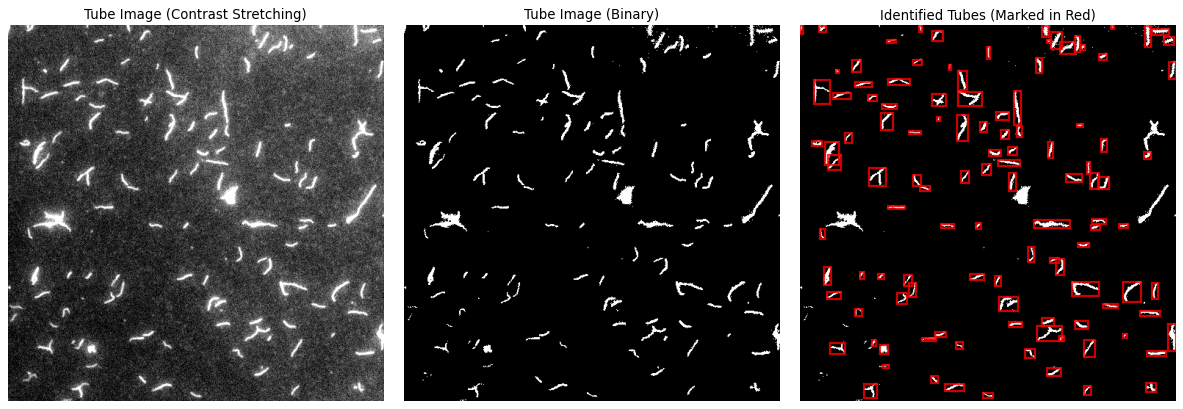

In [10]:
figure = plt.figure(figsize=(15, 5), dpi = 80)

plt.subplot(1, 3, 1)
plt.title("Tube Image (Contrast Stretching)")
p2, p98 = np.percentile(img2, (2, 98))
img_rescale = rescale_intensity(img2, in_range=(p2, p98))
plt.imshow(img_rescale, cmap = "gray")
plt.axis(False)

plt.subplot(1, 3, 2)
plt.title("Tube Image (Binary)")
plt.imshow(binary, cmap = "gray")
plt.axis(False)

ax = plt.subplot(1, 3, 3)
plt.title("Identified Tubes (Marked in Red)")
ax.imshow(binary, cmap="gray")
for i in tube_lists:
    minr, minc, maxr, maxc = i.bbox
    tube_map[minr:maxr, minc:maxc]=1
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2, alpha=.8)
    ax.add_patch(rect)
plt.axis(False)
    
plt.tight_layout()
plt.show()

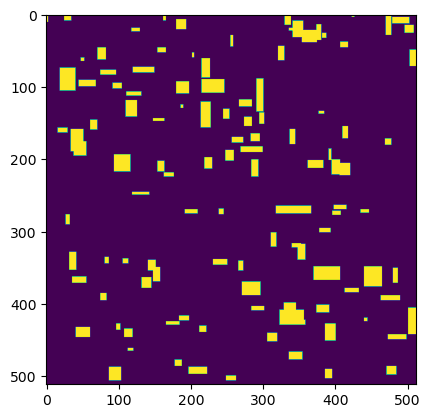

In [11]:
plt.imshow(tube_map)

## Seeded Tubes

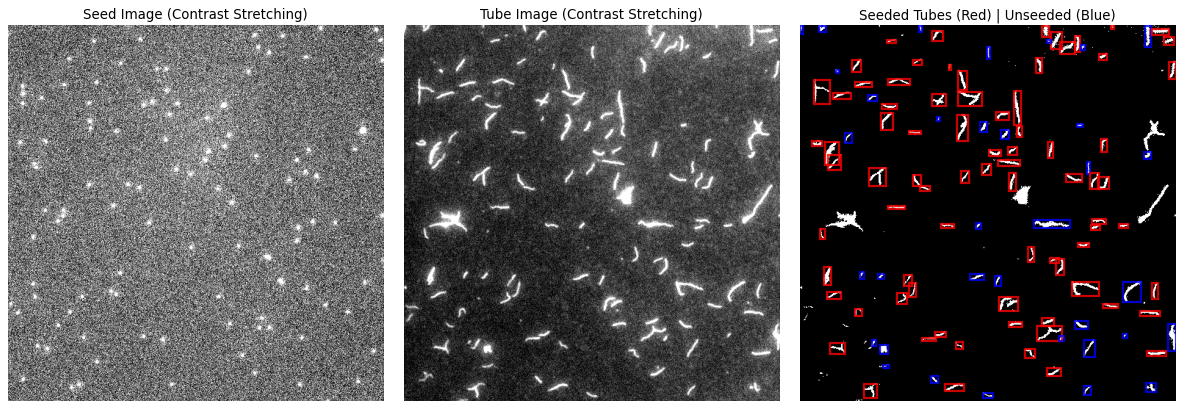

In [13]:
figure = plt.figure(figsize=(15, 5), dpi = 80)

plt.subplot(1, 3, 1)
plt.title("Seed Image (Contrast Stretching)")
p2, p98 = np.percentile(img1, (2, 98))
img_rescale = rescale_intensity(img1, in_range=(p2, p98))
plt.imshow(img_rescale, cmap = "gray")
plt.axis(False)

plt.subplot(1, 3, 2)
plt.title("Tube Image (Contrast Stretching)")
p2, p98 = np.percentile(img2, (2, 98))
img_rescale = rescale_intensity(img2, in_range=(p2, p98))
plt.imshow(img_rescale, cmap = "gray")
plt.axis(False)

ax = plt.subplot(1, 3, 3)
plt.title("Seeded Tubes (Red) | Unseeded (Blue)")
ax.imshow(binary, cmap="gray")
for i in tube_lists:
    minr, minc, maxr, maxc = i.bbox
    if np.sum(seed_map[minr:maxr, minc:maxc]) > 0:
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2, alpha=.8)
        ax.add_patch(rect)
    else:
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='blue', linewidth=2, alpha=.8)
        ax.add_patch(rect)

plt.axis(False)

plt.tight_layout()
plt.show()